In [1]:
from __future__ import print_function

import sys
import os
from glob import glob
from time import time
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import math
#plt.rcParams['figure.figsize'] = 10,8
import datetime

from   invisible_cities.database import load_db
from   invisible_cities.core.system_of_units_c import SystemOfUnits
import invisible_cities.sierpe.blr as blr
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.wfm_functions as wfm
import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.core.peak_functions_c as cpf
import invisible_cities.reco.pmaps_functions as pf
import invisible_cities.core.sensor_functions as sf
from   invisible_cities.core.core_functions import define_window

import invisible_cities.core.pmaps_functions_c as cpm
from   invisible_cities.core.core_functions import lrange
 
units = SystemOfUnits()
t0 = time()

In [2]:
import S1S2prop as prop
import plotting as plot

In [3]:
#%%
#mydf_file = os.environ['IC_DATA']+'/irene/Kr/pmaps_NEXT_v0_08_09_Kr_ACTIVE_55_0_7bar__10000.root.h5'
mydf_file = os.environ['IC_DATA']+'/irene/Na/pmaps_NEXT_v0_08_09_Na_INTERNALPORTANODE_55_0_7bar__10000.root.h5'
#mydf_file = os.environ['IC_DATA']+'/irene/Co/pmaps_NEXT_v0_08_09_Co56_INTERNALPORTANODE_102_0_7bar__10000.root.h5'
print(mydf_file)

mydf = pf.read_pmaps(mydf_file)
#mydf
list(map(type, mydf))
S1df   = mydf[0]
S2df   = mydf[1]
S2Sidf = mydf[2]
print('S1df entries (tbins x events):',len(S1df))
print('S2df entries (tbins x events):',len(S2df))
print('S2Sidf entries:',len(S2Sidf))
type(S1df)
print('Keys of S1df panda dataframe: {} '.format(S1df.keys()))
print('Keys of S2df panda dataframe: {} '.format(S2df.keys()))
print('Keys of S2Sidf panda dataframe: {} '.format(S2Sidf.keys()))

# Convert S12df object  (an S12 pytable read as a PD dataframe) and return an S12L dictionary (list of dict, first dict)
S1dict = pf.df_to_pmaps_dict(S1df,10000)
S2dict = pf.df_to_pmaps_dict(S2df,10000)


evid_S1min = sorted(S1dict.keys())[0]
evid_S1max = sorted(S1dict.keys())[-1]
evid_S2min = sorted(S2dict.keys())[0]
evid_S2max = sorted(S2dict.keys())[-1]
print('First/last event ID (first item in sorted S1 dictionary): {}/{}'.format(evid_S1min,evid_S1max))
print('First/last event ID (first item in sorted S2 dictionary): {}/{}'.format(evid_S2min,evid_S2max))
print('Total number of events in S1 = {}'.format(len(S1dict)))
print('Total number of events in S2 = {}'.format(len(S2dict)))
len(S1dict), type(S1dict), len(S2dict), type(S2dict)




/Users/neus/InvCities/data/irene/Na/pmaps_NEXT_v0_08_09_Na_INTERNALPORTANODE_55_0_7bar__10000.root.h5
S1df entries (tbins x events): 85299
S2df entries (tbins x events): 151016
S2Sidf entries: 929469
Keys of S1df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2df panda dataframe: Index(['event', 'evtDaq', 'peak', 'time', 'ene'], dtype='object') 
Keys of S2Sidf panda dataframe: Index(['event', 'evtDaq', 'peak', 'nsipm', 'nsample', 'ene'], dtype='object') 
First/last event ID (first item in sorted S1 dictionary): 0/9960
First/last event ID (first item in sorted S2 dictionary): 0/9960
Total number of events in S1 = 9025
Total number of events in S2 = 9913


(9025, dict, 9913, dict)

In [4]:
S1 = prop.S12Prop(S1dict)
S2 = prop.S12Prop(S2dict)

type(S1)
S2.length, S1.length
S1.dict().keys() == S2.dict().keys()

False

In [5]:
S1map = S1.S1S2mapd(S2)[0]
S2map = S1.S1S2mapd(S2)[1]
S1map.dict().keys() == S2map.dict().keys()

True

/Users/neus/miniconda/envs/IC3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


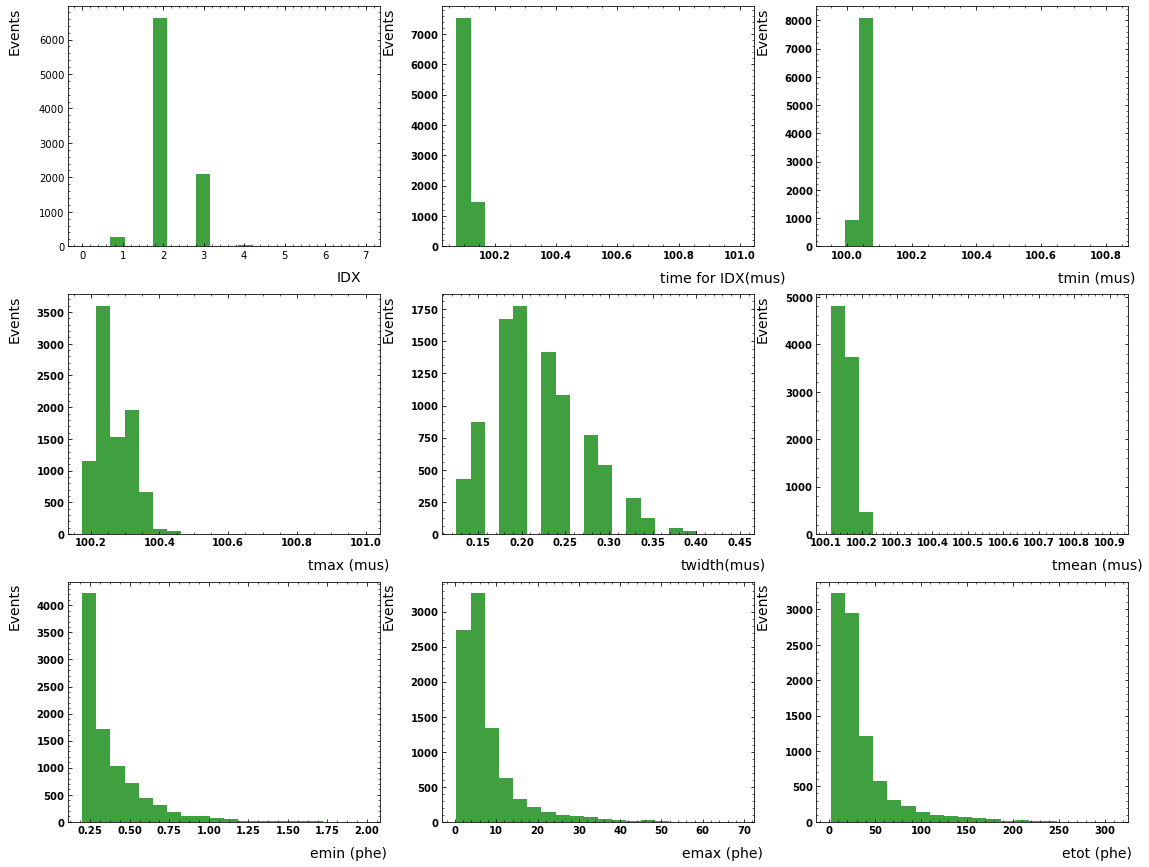

In [6]:
fig = plt.figure(figsize = (19,15))
ax1 = fig.add_subplot(3,3,1)
plot.new_h12(S1map.IDX, 20,    ax1, color="green", title="", xlabel ="IDX", ylabel = "Events")
#ax1.set_yscale('log')
ax2 = fig.add_subplot(3,3,2)
plot.new_h12(S1map.tIDX, 20,   ax2, color="green", title="", xlabel ="time for IDX(mus)", ylabel = "Events")
ax3 = fig.add_subplot(3,3,3)
plot.new_h12(S1map.tmin, 20,   ax3, color="green", title="", xlabel ="tmin (mus)", ylabel = "Events")
ax4 = fig.add_subplot(3,3,4)
plot.new_h12(S1map.tmax, 20,   ax4, color="green", title="", xlabel ="tmax (mus)", ylabel = "Events")
ax5 = fig.add_subplot(3,3,5)
plot.new_h12(S1map.twidth, 20, ax5, color="green", title="", xlabel ="twidth(mus)", ylabel = "Events")
ax6 = fig.add_subplot(3,3,6)
plot.new_h12(S1map.tmean, 20,  ax6, color="green", title="", xlabel ="tmean (mus)", ylabel = "Events")
ax7 = fig.add_subplot(3,3,7)
plot.new_h12(S1map.emin, 20,   ax7, color="green", title="", xlabel ="emin (phe)", ylabel = "Events")
ax8 = fig.add_subplot(3,3,8)
plot.new_h12(S1map.emax, 20,   ax8, color="green", title="", xlabel ="emax (phe)", ylabel = "Events")
ax9 = fig.add_subplot(3,3,9)
plot.new_h12(S1map.etot, 20,   ax9, color="green", title="", xlabel ="etot (phe)", ylabel = "Events")

/Users/neus/miniconda/envs/IC3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


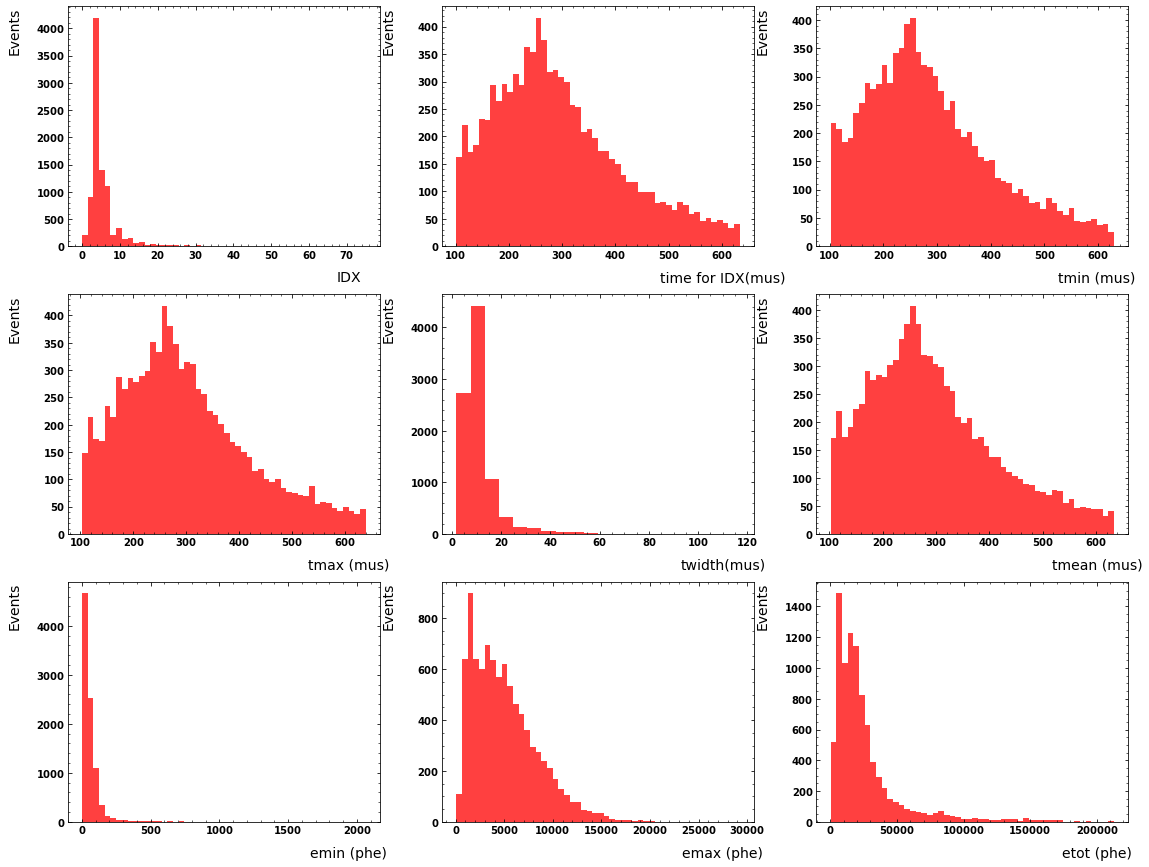

In [7]:
fig = plt.figure(figsize = (19,15))
ax1 = fig.add_subplot(3,3,1)
plot.new_h12(S2map.IDX, 50,    ax1, color="red", title="", xlabel ="IDX", ylabel = "Events")
#ax1.set_yscale('log')
ax2 = fig.add_subplot(3,3,2)
plot.new_h12(S2map.tIDX, 50,   ax2, color="red", title="", xlabel ="time for IDX(mus)", ylabel = "Events")
ax3 = fig.add_subplot(3,3,3)
plot.new_h12(S2map.tmin, 50,   ax3, color="red", title="", xlabel ="tmin (mus)", ylabel = "Events")
ax4 = fig.add_subplot(3,3,4)
plot.new_h12(S2map.tmax, 50,   ax4, color="red", title="", xlabel ="tmax (mus)", ylabel = "Events")
ax5 = fig.add_subplot(3,3,5)
plot.new_h12(S2map.twidth, 20, ax5, color="red", title="", xlabel ="twidth(mus)", ylabel = "Events")
ax6 = fig.add_subplot(3,3,6)
plot.new_h12(S2map.tmean, 50,  ax6, color="red", title="", xlabel ="tmean (mus)", ylabel = "Events")
ax7 = fig.add_subplot(3,3,7)
plot.new_h12(S2map.emin, 50,   ax7, color="red", title="", xlabel ="emin (phe)", ylabel = "Events")
ax8 = fig.add_subplot(3,3,8)
plot.new_h12(S2map.emax, 50,   ax8, color="red", title="", xlabel ="emax (phe)", ylabel = "Events")
ax9 = fig.add_subplot(3,3,9)
plot.new_h12(S2map.etot, 50,   ax9, color="red", title="", xlabel ="etot (phe)", ylabel = "Events")

In [8]:
def new_h12(x, nbins, ax = None, color="red", title="", xlabel="", ylabel="Entries",
       legend="hi"):

    if ax is None:
        fig, ax = plt.subplots()
        
    mycolor = color
    plt.hist(x, nbins, color = mycolor, histtype="bar", alpha=0.75)
    plt.rc('font', weight='bold')
    plt.title(title)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(loc='upper left')   

   # majorLocator = MultipleLocator(2)  # x * 2 , subdivisió entre numeros visibles, cuants ticks entre els dos consecutius.
    #majorFormatter = FormatStrFormatter('%d')
    #minorLocator = MultipleLocator(0.5)  # x value for small ticks
    #ax.xaxis.set_major_formatter(majorFormatter)
    ax.tick_params(which='both', direction='in')

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
   
    ax.xaxis.set_label_coords(0.9, -0.10)
    ax.yaxis.set_label_coords(-0.15, 0.90) # 1st value: distance to the plot, 2nd:  starts to write label from this value up 
    
    # add ticks in opposite axis
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    
    ax.legend(loc='best', fancybox=True)



In [9]:
z = S2map.tIDX - S1map.tIDX

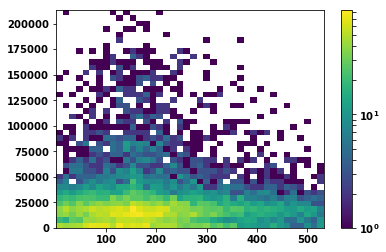

In [10]:
from matplotlib.colors import LogNorm
plt.hist2d(z, S2map.etot, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

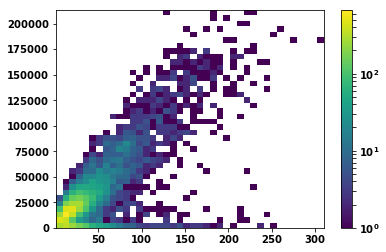

In [11]:
plt.hist2d(S1map.etot, S2map.etot, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

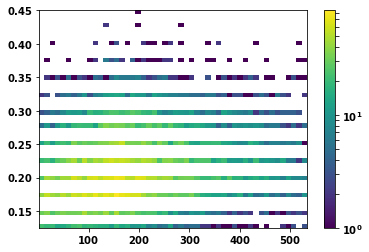

In [12]:
plt.hist2d(z,S1map.twidth, bins=50, norm=LogNorm())
plt.colorbar()
plt.show()

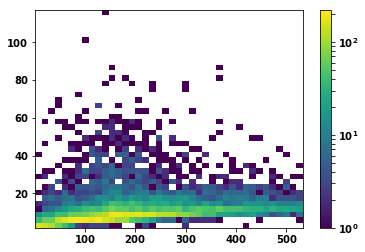

In [13]:
plt.hist2d(z,S2map.twidth, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

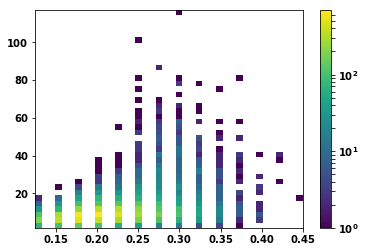

In [14]:
plt.hist2d(S1map.twidth,S2map.twidth, bins=40, norm=LogNorm())
plt.colorbar()
plt.show()

In [15]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FormatStrFormatter
def new_h1(x, nbins, color="red", title="", xlabel="", ylabel="Entries", label="legend"):
    mycolor = color
    plt.figure(figsize=(7, 5), dpi=100) 
    plt.hist(x, nbins, color = mycolor, histtype="bar", alpha=0.5, label = "hi")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#    plt.text(2700, 700, r'$\mu=100,\ \sigma=15$')
    plt.text(2700, 650, 'Entries = 2222')
    plt.text(2700, 600, 'mean        22')
    plt.text(2700, 550, 'rms =        2')
   
    ax = plt.axes()
    # Now add the legend with some customizations.
    legend = ax.legend(loc='center right', fancybox=True, framealpha=0.5)

    ax.tick_params(which='both', direction='in')
    #plt.rc('font', weight='bold')
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_label_coords(0.9, -0.10)
    ax.yaxis.set_label_coords(-0.1, 0.95)

    # add ticks in opposite axis
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')

In [16]:
def new_h12(x, nbins, ax = None, color="red", title="", xlabel="", ylabel="Entries"):

    if ax is None:
        fig, ax = plt.subplots()
        
    mycolor = color
    plt.hist(x, nbins, color = mycolor, histtype="bar", alpha=0.75)
    plt.rc('font', weight='bold')
    plt.title(title)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    #plt.legend(loc='best', fancybox=True, framealpha=0.5)
    
   # majorLocator = MultipleLocator(2)  # x * 2 , subdivisió entre numeros visibles, cuants ticks entre els dos consecutius.
    #majorFormatter = FormatStrFormatter('%d')
    #minorLocator = MultipleLocator(0.5)  # x value for small ticks
    #ax.xaxis.set_major_formatter(majorFormatter)
    ax.tick_params(which='both', direction='in')

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
   
    ax.xaxis.set_label_coords(0.9, -0.10)
    ax.yaxis.set_label_coords(-0.15, 0.90) # 1st value: distance to the plot, 2nd:  starts to write label from this value up 
    
    # add ticks in opposite axis
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    return ax


/Users/neus/miniconda/envs/IC3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


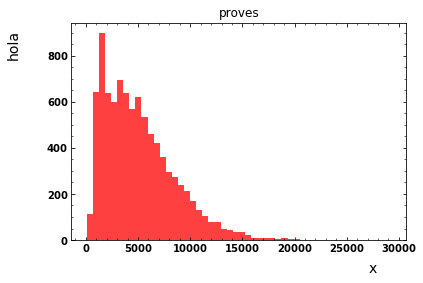

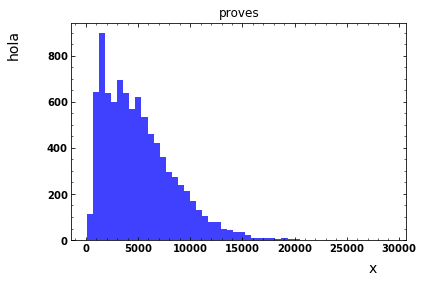

In [17]:
ax = plot.new_h12(S2map.emax, 50, color="red",  title = "proves", xlabel='x', ylabel='hola')
plot.new_h12(S2map.emax, 50,ax,  color="blue",  title = "proves", xlabel='x', ylabel='hola')
plt.show()

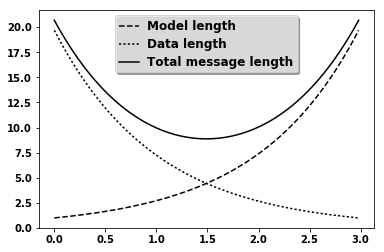

In [18]:
"""
Demo of the legend function with a few features.

In addition to the basic legend, this demo shows a few optional features:

    * Custom legend placement.
    * A keyword argument to a drop-shadow.
    * Setting the background color.
    * Setting the font size.
    * Setting the line width.
"""
import numpy as np
import matplotlib.pyplot as plt


# Example data
a = np.arange(0,3, .02)
b = np.arange(0,3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c+d, 'k', label='Total message length')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()